In [1]:
# cnn model
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import keras
import sklearn
from matplotlib import pyplot
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.utils import to_categorical
try: from sklearn.model_selection import train_test_split
except: from sklearn.cross_validation import train_test_split
import pandas as pd
import numpy as np
from sklearn import datasets
import sys
sys.path.insert(0,'..')

from time import time
from keras.callbacks import TensorBoard

Using TensorFlow backend.


In [2]:
def evaluate(y_test,m):
    #evaluate results
    mse=sklearn.metrics.mean_squared_error(y_test,m)
    mabs=sklearn.metrics.mean_absolute_error(y_test,m)
    exvar=sklearn.metrics.explained_variance_score(y_test,m)   
    print('Mean Squa Error :',mse)
    print('Mean Abso Error :',mabs)
    print('Expl. Variance  :',exvar,'\n')

### Read the train & test and preprocessing

In [3]:
# load data
import pandas as pd
# load data
df=pd.read_csv('BlogFeedback/blogData_train.csv', header=None)
# del df['Date']
# del df['Next_Tmax'] #Next_Tmin
# drop nan 
df = df.dropna()
# the head of df
df.head()

,0,1,2,3,4,5,6,7,8,9,...,271,272,273,274,275,276,277,278,279,280
0,40.30467,53.845657,0.0,401.0,15.0,15.52416,32.44188,0.0,377.0,3.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,40.30467,53.845657,0.0,401.0,15.0,15.52416,32.44188,0.0,377.0,3.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,40.30467,53.845657,0.0,401.0,15.0,15.52416,32.44188,0.0,377.0,3.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,40.30467,53.845657,0.0,401.0,15.0,15.52416,32.44188,0.0,377.0,3.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,40.30467,53.845657,0.0,401.0,15.0,15.52416,32.44188,0.0,377.0,3.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.0


In [4]:
# df to values
df = df.values
Y = df[:,280]
X = df[:,0:280]

X = X.reshape(X.shape[0], X.shape[1], 1)
print(X.shape)

x_train,x_test,y_train,y_test=train_test_split(X, Y, test_size=0.2, random_state=1) 
x_train_, x_test_, y_train_, y_test_ = x_train, x_test, y_train, y_test

(52397, 280, 1)


In [5]:
def standardize(train, test):

    mean = np.mean(train, axis=0)
    std = np.std(train, axis=0)+0.000001

    X_train = (train - mean) / std
    X_test = (test - mean) /std
    return X_train, X_test

x_train, x_test = standardize(x_train, x_test)

In [6]:
x_test.shape

(10480, 280, 1)

In [7]:
# print(np.any(np.isnan(X_test)))
# print(np.any(np.isnan(y_test)))

### Creation structure of CNN

In [8]:
# build CNN
def CNN_net():
    
    model = Sequential()
    model.add(Conv1D(64, 3, activation="relu", input_shape=(X.shape[1],1)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.5))
    
    model.add(Conv1D(128, 3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.5))    
    
    
    model.add(Flatten())
    #model.add(Dense(64, activation="relu"))
    model.add(Dense(1))
    model.compile(loss="mse", optimizer="adam")
    
    return model

In [9]:
# Parametres
verbose, epochs, batch_size = 1, 250, 5
# initialize the model object
clf_cnn = CNN_net()
# fit network #Train the model using tensorboard instance in the callbacks
history = clf_cnn.fit(x_train, y_train, batch_size=batch_size,
          epochs=epochs, verbose=verbose, validation_data=(x_test, y_test))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Train on 41917 samples, validate on 10480 samples
Epoch 1/250
41917/41917 [==============================] - 74s 2ms/step - loss: 1076.6249 - val_loss: 953.4595
Epoch 2/250
41917/41917 [==============================] - 68s 2ms/step - loss: 1019.0695 - val_loss: 947.3193
Epoch 3/250
41917/41917 [==============================] - 67s 2ms/step - loss: 994.9458 - val_loss: 838.0732
Epoch 4/250
41917/41917 [==============================] - 71s 2ms/step - loss: 983.7467 - val_loss: 851.5921
Epoch 5/250
41917/41917 [==============================] - 69s 2ms/step - loss: 1000.6636 - val_loss: 844.0055
Epoch 6/250
41917/41917 [==============================] - 74s 2ms/step - loss: 964.0847 - val_loss: 842.0788
Epoch 7/250
41917/41917 [==============================] - 70s 2ms/step - loss: 969.6718 - val_loss: 885.9037
Epoch 8/250
41917/41917 [==============================] - 67s 2ms/step - loss: 955.7134 - val

41917/41917 [==============================] - 65s 2ms/step - loss: 883.3804 - val_loss: 678.4046
Epoch 140/250
41917/41917 [==============================] - 66s 2ms/step - loss: 846.1818 - val_loss: 749.7627
Epoch 141/250
41917/41917 [==============================] - 64s 2ms/step - loss: 874.1847 - val_loss: 724.6687
Epoch 142/250
41917/41917 [==============================] - 64s 2ms/step - loss: 896.1920 - val_loss: 713.3825
Epoch 143/250
41917/41917 [==============================] - 64s 2ms/step - loss: 863.7921 - val_loss: 700.2316
Epoch 144/250
41917/41917 [==============================] - 65s 2ms/step - loss: 890.2755 - val_loss: 728.3466
Epoch 145/250
41917/41917 [==============================] - 64s 2ms/step - loss: 876.2147 - val_loss: 718.3940
Epoch 146/250
41917/41917 [==============================] - 64s 2ms/step - loss: 888.8383 - val_loss: 758.9718
Epoch 147/250
41917/41917 [==============================] - 65s 2ms/step - loss: 883.0422 - val_loss: 738.9204
Epoch 

In [10]:
ypred = clf_cnn.predict(x_test)

print(" Model.evaluate : ",clf_cnn.evaluate(x_train, y_train),'\n')

#evaluate results
mse=sklearn.metrics.mean_squared_error(y_test,ypred)
mabs=sklearn.metrics.mean_absolute_error(y_test,ypred)
exvar=sklearn.metrics.explained_variance_score(y_test,ypred)   
print('Mean Squa Error :',mse)
print('Mean Abso Error :',mabs)
print('Expl. Variance  :',exvar)

41917/41917 [==============================] - 10s 243us/step
 Model.evaluate :  864.3984858125216 

Mean Squa Error : 802.1961929013089
Mean Abso Error : 9.49680335867496
Expl. Variance  : 0.437747697316349


In [11]:
clf_cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 278, 64)           256       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 139, 64)           0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 139, 64)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 137, 128)          24704     
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 68, 128)           0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 68, 128)           0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 8704)             

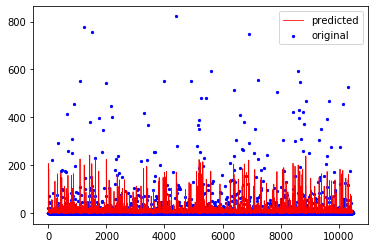

In [12]:
#https://www.datatechnotes.com/2019/12/how-to-fit-regression-data-with-cnn.html
x_ax = range(len(ypred))
plt.scatter(x_ax, y_test, s=5, color="blue", label="original")
plt.plot(x_ax, ypred, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

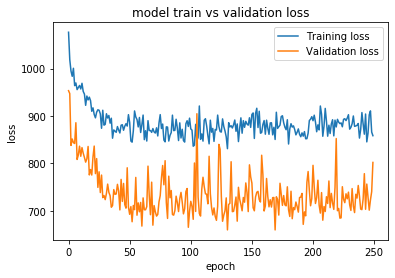

In [13]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Training loss','Validation loss'], loc='best')
plt.show()

### Testing the Novel Approach

### Feature Extraction by CNN

In [14]:
from keras.models import Model
# from the first Fully-Connected layer 
layer_name = 'dense_1'
intermediate_layer_model = Model(inputs=clf_cnn.input,
                                 outputs=clf_cnn.get_layer(layer_name).output)

In [15]:
# Save the features of the train dataset to use it in future.
out_cnn_train = intermediate_layer_model.predict(x_train)
# Save the features of the test dataset to use it in future.
out_cnn_test = intermediate_layer_model.predict(x_test)

In [16]:
print('Training Features (from CNN) Shape:', out_cnn_train.shape)
print('Training Labels (from CNN) Shape:', y_train.shape,'\n')

print('Test Features (from CNN) Shape:', out_cnn_test.shape)
print('Test Labels (from CNN) Shape:', y_test.shape,'\n')

print('Test Features original Shape:', x_train_.shape)
print('Test Features original Shape:', x_test_.shape)

Training Features (from CNN) Shape: (41917, 1)
Training Labels (from CNN) Shape: (41917,) 

Test Features (from CNN) Shape: (10480, 1)
Test Labels (from CNN) Shape: (10480,) 

Test Features original Shape: (41917, 280, 1)
Test Features original Shape: (10480, 280, 1)


### Classification by CNN + Random Forest + MLP

In [17]:
from djinn import djinn
print("djinn example")    
modelname="reg_djinn_test"   # name the model
ntrees=1                 # number of trees = number of neural nets in ensemble
maxdepth=5               # max depth of tree -- optimize this for each data set
dropout_keep=1.0         # dropout typically set to 1 for non-Bayesian models

#initialize the model
model=djinn.DJINN_Regressor(ntrees,maxdepth,dropout_keep)
x_train, y_train, x_test, y_test = out_cnn_train, y_train, out_cnn_test, y_test

# find optimal settings: this function returns dict with hyper-parameters
# each djinn function accepts random seeds for reproducible behavior
optimal=model.get_hyperparameters(x_train, y_train, random_state=42)
batchsize=optimal['batch_size']
learnrate=optimal['learn_rate']
epochs=optimal['epochs']

# batchsize=304
# learnrate=0.002474296684203603
# epochs=210
 
# train the model with hyperparameters determined above
model.train(x_train,y_train,epochs=epochs,learn_rate=learnrate, batch_size=batchsize, 
              display_step=1, save_files=True, file_name=modelname, 
              save_model=True,model_name=modelname, random_state=1)

# *note there is a function model.fit(x_train,y_train, ... ) that wraps 
# get_hyperparameters() and train(), so that you do not have to manually
# pass hyperparameters to train(). However, get_hyperparameters() can
# be expensive, so I recommend running it once per dataset and using those
# hyperparameter values in train() to save computational time

# make predictions
m=model.predict(x_test) #returns the median prediction if more than one tree

#evaluate results
evaluate(y_test,m)

#close model 
model.close_model()

djinn example
Finding optimal hyper-parameters...
Determining learning rate...


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Determining number of epochs needed...



Optimal learning rate:  0.001291549665014884
Optimal # epochs:  210
Optimal batch size:  2096



Epoch: 0001 cost= 0.084539423
Epoch: 0002 cost= 0.028272369
Epoch: 0003 cost= 0.005398932
Epoch: 0004 cost= 0.000826433
Epoch: 0005 cost= 0.000704609
Epoch: 0006 cost= 0.000556509
Epoch: 0007 cost= 0.000492659
Epoch: 0008 cost= 0.000473082
Epoch: 0009 cost= 0.000342924
Epoch: 0010 cost= 0.000354593
E

Epoch: 0208 cost= 0.000322496
Epoch: 0209 cost= 0.000374074
Epoch: 0210 cost= 0.000417651
Optimization Finished!
Model saved in: ./reg_djinn_test_tree0.ckpt

INFO:tensorflow:Restoring parameters from ./reg_djinn_test_tree0.ckpt
Model 0 restored
Mean Squa Error : 669.3116016818022
Mean Abso Error : 7.70337128249061
Expl. Variance  : 0.528598999411699 



### Classification by CNN + ( SVM, XGB, DTree, ExtraTrees, RandomFores)


In [18]:
#https://stackoverflow.com/questions/41925157/logisticregression-unknown-label-type-continuous-using-sklearn-in-python
import numpy as np
from sklearn import linear_model
from sklearn import svm

classifiers = [
    svm.SVR(gamma='scale'),
    linear_model.SGDRegressor(),
    linear_model.BayesianRidge(),
    linear_model.LassoLars(),
    linear_model.ARDRegression(),
    linear_model.PassiveAggressiveRegressor(),
    linear_model.TheilSenRegressor(),
    linear_model.LinearRegression()
              ]

for item in classifiers:
    print(item,'\n')
    clf = item
    clf.fit(out_cnn_train, y_train)
    #print(clf.predict(predictionData),'\n')
    #Feed the features of the test to ExtraTreesClassifier Classifier to predict its class
    m = clf.predict(out_cnn_test)
    #evaluate results
    mse=sklearn.metrics.mean_squared_error(y_test,m)
    mabs=sklearn.metrics.mean_absolute_error(y_test,m)
    exvar=sklearn.metrics.explained_variance_score(y_test,m)   
    print('Mean Squa Error :',mse)
    print('Mean Abso Error :',mabs)
    print('Expl. Variance  :',exvar,'\n')
    print("================================================================================")

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False) 

Mean Squa Error : 1025.5524111481084
Mean Abso Error : 5.917936351365955
Expl. Variance  : 0.29019655465474203 

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False) 

Mean Squa Error : 2.095314568549383e+16
Mean Abso Error : 116904371.44781217
Expl. Variance  : -8708278435217.713 

BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, compute_score=False, copy_X=True,
              fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
              normalize=False, tol=0.001, verbose=False) 

Mean 

MemoryError: 

In [ ]:
#Feed the extracted features with the labels to RANDOM FOREST 
from xgboost import XGBRegressor
XGBModel = XGBRegressor()
XGBModel.fit(out_cnn_train, y_train , verbose=False)
# Get the mean absolute error on the validation data :
XGBpredictions = XGBModel.predict(out_cnn_test)
print('CNN XGBRegressor      ')
evaluate(y_test,XGBpredictions)

    
from sklearn.ensemble import ExtraTreesRegressor
Ext = ExtraTreesRegressor(n_estimators=10)
Ext.fit(out_cnn_train, y_train)
#Feed the features of the test to ExtraTreesClassifier Classifier to predict its class
predictionsCNN_Ext = Ext.predict(out_cnn_test)
print('CNN ExtraTreesRegressor      ')
evaluate(y_test,predictionsCNN_Ext)


from sklearn import tree
clf_dt = tree.DecisionTreeRegressor()
clf_dt.fit(out_cnn_train, y_train)
# Get the mean absolute error on the validation data :
clf_dtpredictions = clf_dt.predict(out_cnn_test)
print('CNN DecisionTreeRegressor      ')
evaluate(y_test,clf_dtpredictions)

In [ ]:
out_cnn_train.shape

###  MLP

In [ ]:
# Regression Example With Boston Dataset: Baseline
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from keras.wrappers.scikit_learn import KerasClassifier


def baseline_model():
	# create model
	model = Sequential()
	model.add(Dense(128, input_dim=out_cnn_train.shape[1], kernel_initializer='normal', activation='relu'))
	model.add(Dense(64, activation='relu'))
	model.add(Dense(1, kernel_initializer='normal'))
	# Compile model
	model.compile(loss='mean_squared_error', optimizer='adam')
	return model


clf_MLP = KerasClassifier(build_fn = baseline_model, epochs = 50, batch_size=5, verbose=1)
clf_MLP.fit(out_cnn_train, y_train)
y_predmlp = clf_MLP.predict(out_cnn_test)

#print("CNN MLP Model.evaluate : ",clf_MLP.evaluate(out_cnn_test, y_train),'\n')
#evaluate results
mse=sklearn.metrics.mean_squared_error(y_test,y_predmlp)
mabs=sklearn.metrics.mean_absolute_error(y_test,y_predmlp)
exvar=sklearn.metrics.explained_variance_score(y_test,y_predmlp)   
print('CNN MLP Mean Squa Error :',mse)
print('CNN MLP Mean Abso Error :',mabs)
print('CNN MLP Expl. Variance  :',exvar)

### Classification by RandomForest, ExtraTrees, XGBRegressor

In [ ]:
x_train_ = x_train_.reshape(x_train_.shape[0], x_train_.shape[1])
x_test_  = x_test_.reshape(x_test_.shape[0], x_test_.shape[1])

In [ ]:
# RandomForestClassifier : from dataset originl
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100)
rf.fit(x_train_, y_train_)
predictions = rf.predict(x_test_)
print('CNN RandomForestRegressor      ')
evaluate(y_test_,predictions)


#Feed the extracted features with the labels to RANDOM FOREST 
from xgboost import XGBRegressor
XGBModel = XGBRegressor()
XGBModel.fit(x_train_, y_train_ , verbose=False)
# Get the mean absolute error on the validation data :
XGBpredictions = XGBModel.predict(x_test_)
print('CNN XGBRegressor      ')
evaluate(y_test_,XGBpredictions)

    
from sklearn.ensemble import ExtraTreesRegressor
Ext = ExtraTreesRegressor(n_estimators=10)
Ext.fit(x_train_, y_train_)
#Feed the features of the test to ExtraTreesClassifier Classifier to predict its class
predictionsCNN_Ext = Ext.predict(x_test_)
print('CNN ExtraTreesRegressor      ')
evaluate(y_test_,predictionsCNN_Ext)